# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,254.0,3.892834e+07,0.652481
Albania,682.0,2.877800e+06,23.698659
Algeria,2326.0,4.385104e+07,5.304321
Andorra,28.0,7.726500e+04,36.238918
Angola,173.0,3.286627e+07,0.526376
Antigua and Barbuda,1.0,9.792800e+04,1.021158
Argentina,30552.0,4.519578e+07,67.599236
Armenia,907.0,2.963234e+06,30.608450
Australia,1415.0,2.545970e+07,5.557803


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Peru,46266.0,3.297185e+07,140.319714
Panama,5166.0,4.314768e+06,119.728338
Bahrain,1921.0,1.701583e+06,112.894875
Colombia,54141.0,5.088288e+07,106.403167
Maldives,543.0,5.405420e+05,100.454729
Brazil,194785.0,2.125594e+08,91.637910
Costa Rica,4027.0,5.094114e+06,79.052020
Israel,6600.0,8.655541e+06,76.251733
Bahamas,293.0,3.932480e+05,74.507690


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

8/13/20    222281.0
8/14/20    223791.0
8/15/20    224488.0
8/16/20    225007.0
8/17/20    226700.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

8/12/20       NaN
8/13/20    1422.0
8/14/20    1510.0
8/15/20     697.0
8/16/20     519.0
8/17/20    1693.0
Name: Germany, dtype: float64

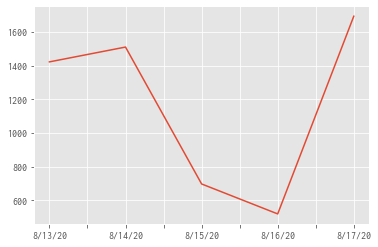

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany[-1] / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2.0206735311878665